In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.datasets import mnist
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

#printing the shapes of the vectors 
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


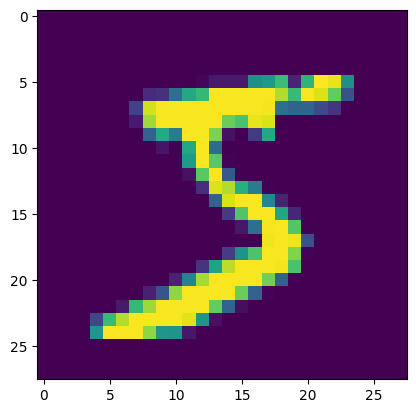

In [5]:
plt.imshow(train_X[0])

In [7]:
import tensorflow as tf

In [63]:
train_X = train_X.reshape(train_X.shape[0], 784)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(784,activation="leaky_relu"),
    tf.keras.layers.Dense(100,activation="leaky_relu"),
    tf.keras.layers.Dense(10,activation="leaky_relu"),
    tf.keras.layers.Softmax()
])

In [64]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy,
    metrics = ['accuracy']
)

train_y.shape
train_X.shape

(60000, 784)

In [65]:
model.fit(train_X,train_y,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8315 - loss: 3.2710
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9253 - loss: 0.4280
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9319 - loss: 0.4643
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9489 - loss: 0.3448
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9465 - loss: 0.4202
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9567 - loss: 0.2999
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9594 - loss: 0.2706
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9671 - loss: 0.1987
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9626 - loss: 0.2798
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9632 - loss: 0.2780


In [79]:
model.layers
def maxer(list)->int:
    maxi = 0
    maxval = -1
    for i in range(len(list)):
        if(list[i]>maxval):
            maxi = i
            maxval = list[i]
    return maxi

In [94]:
test_X = test_X.reshape(test_X.shape[0], 28*28)

In [95]:
predictor = model.predict(test_X)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [96]:
accuracy = 0
iter = []
pred = []
count = 0
for i,j in zip(predictor,test_y):
    if maxer(i) == j:
        accuracy+=1
    else:
        iter.append(count)
        pred.append(maxer(i))
    count+=1
print(accuracy/len(predictor))
    
    

0.9554


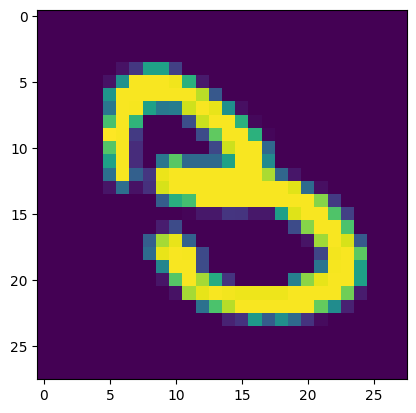

8


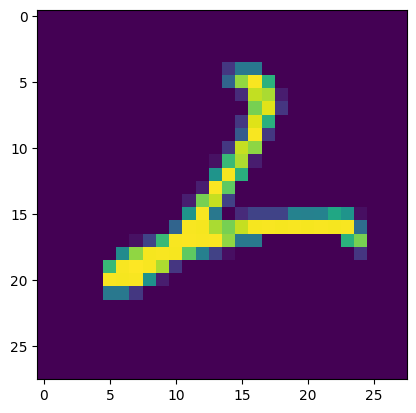

1


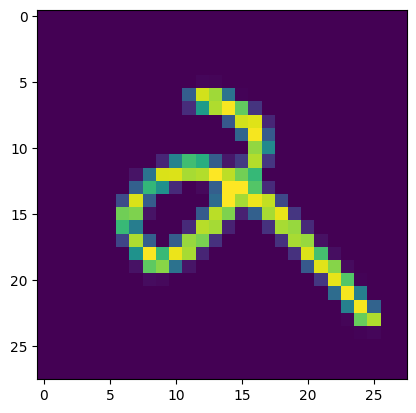

9


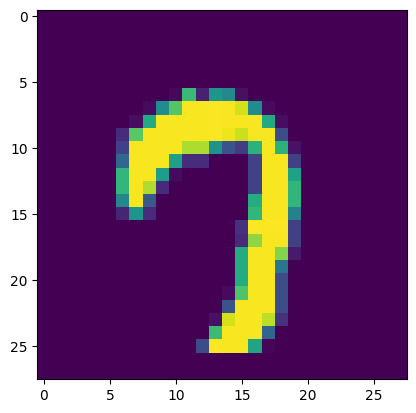

9


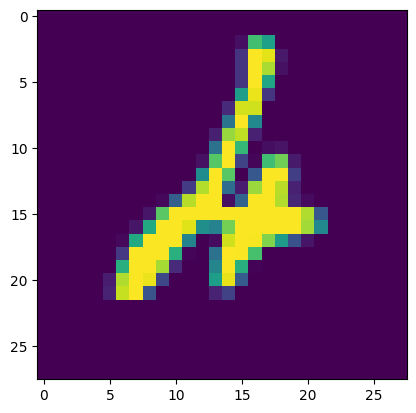

2


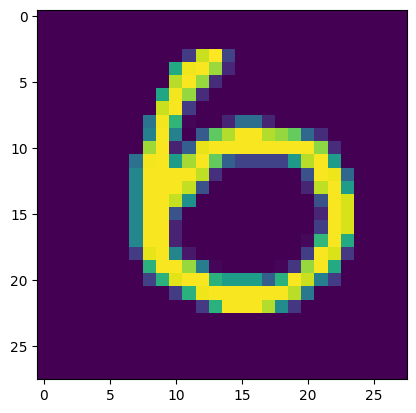

0


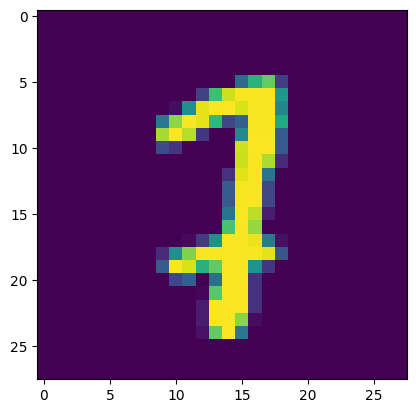

2


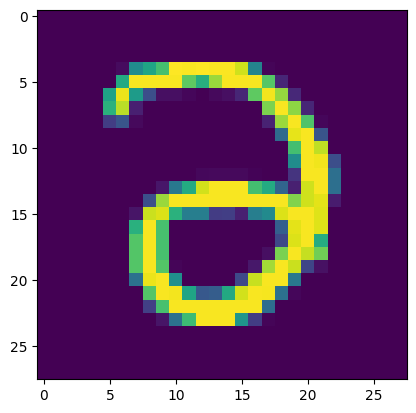

0


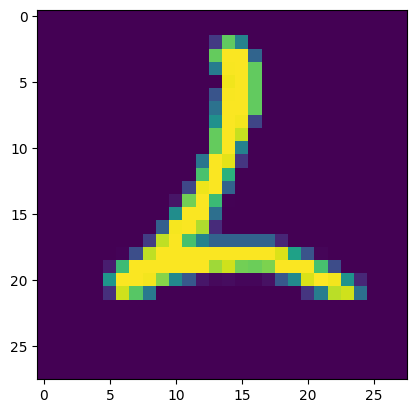

1


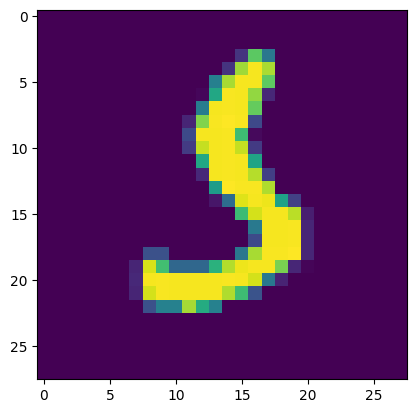

3


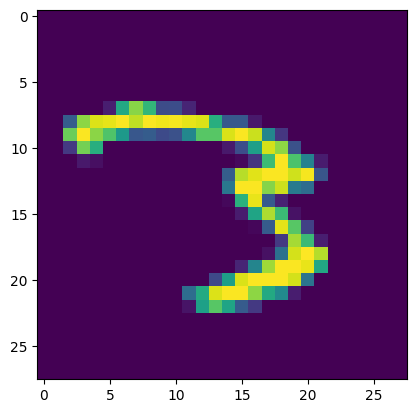

7


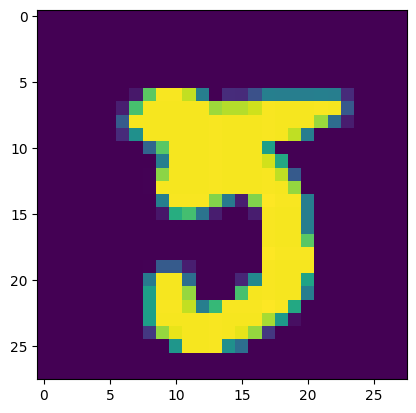

3


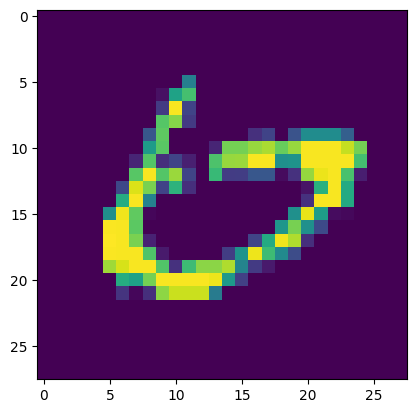

0


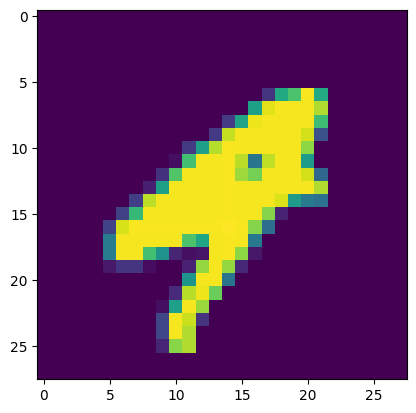

9


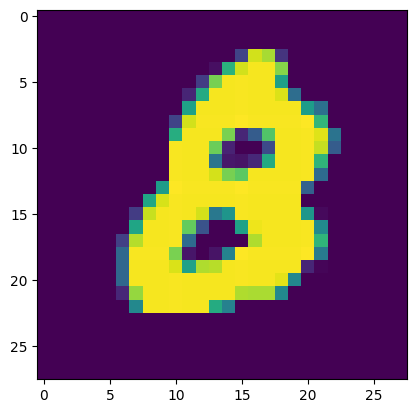

0


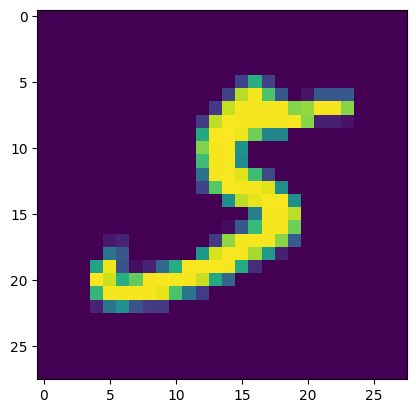

3


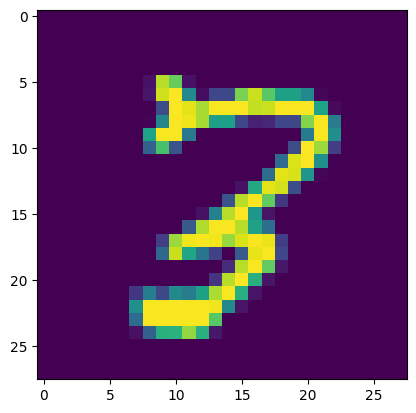

2


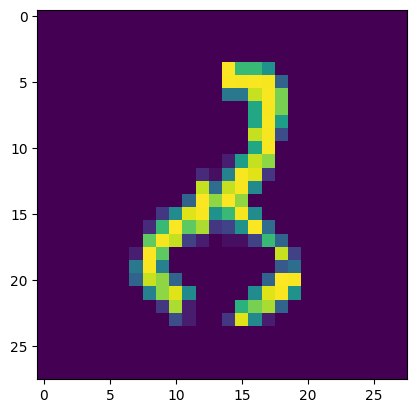

2


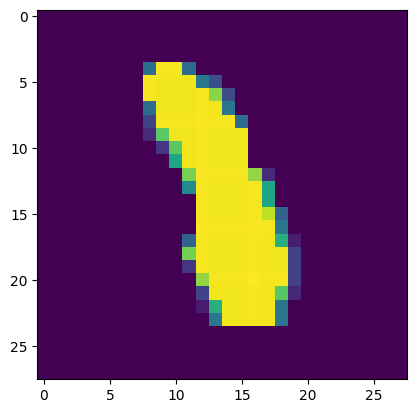

2


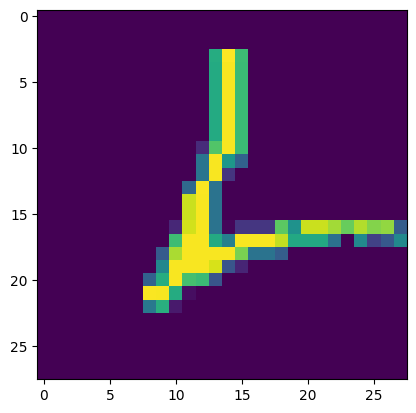

6


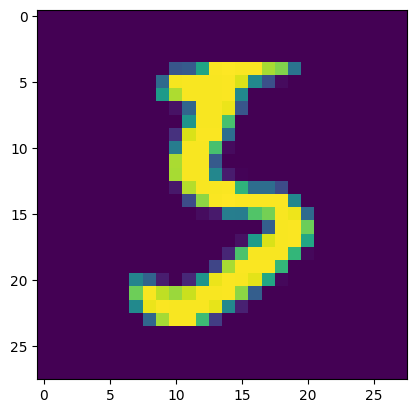

3


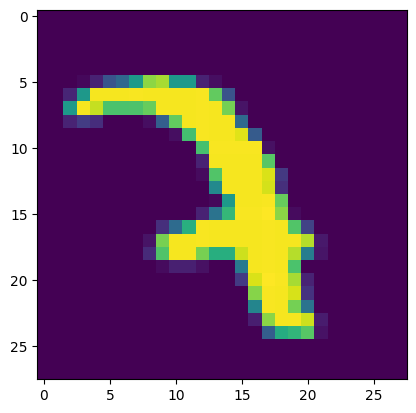

2


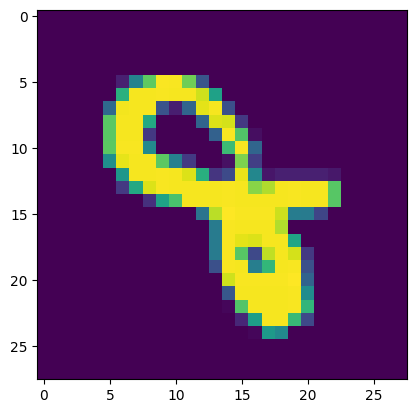

4


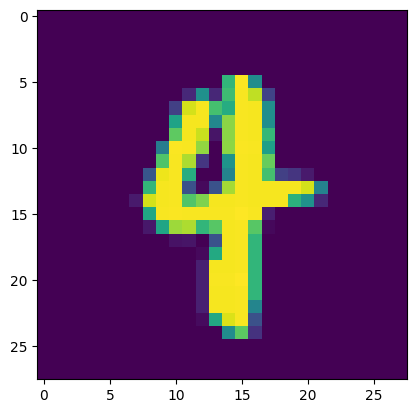

9


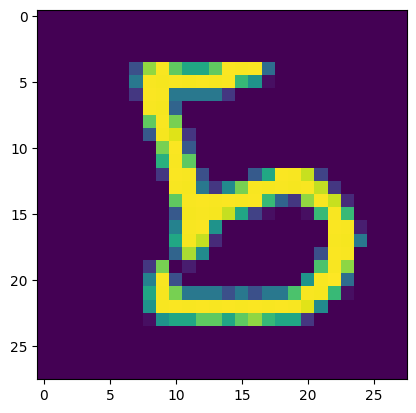

8


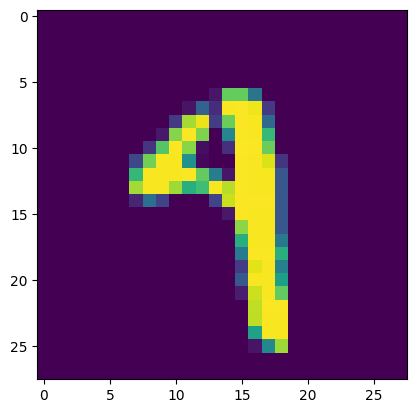

9


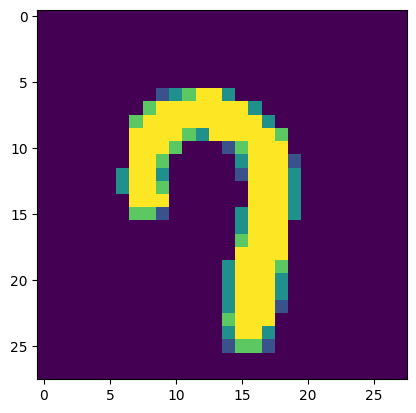

9


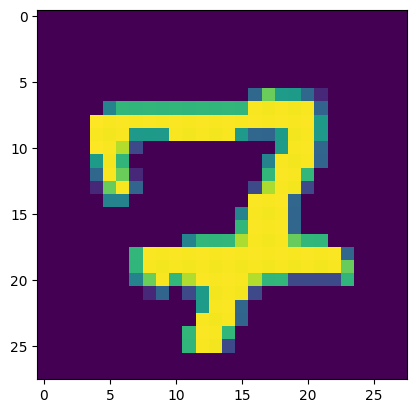

2


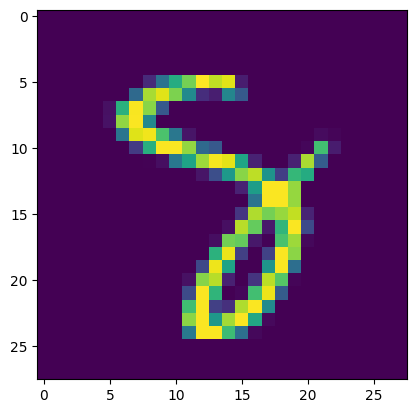

7


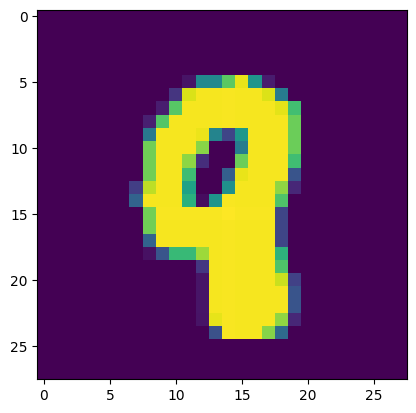

9


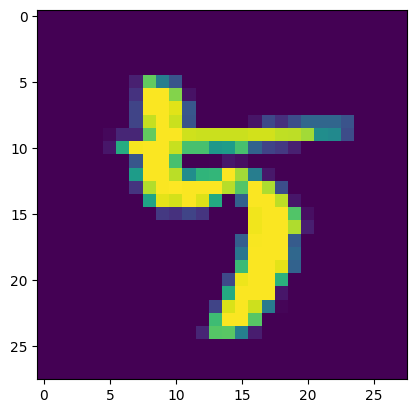

4


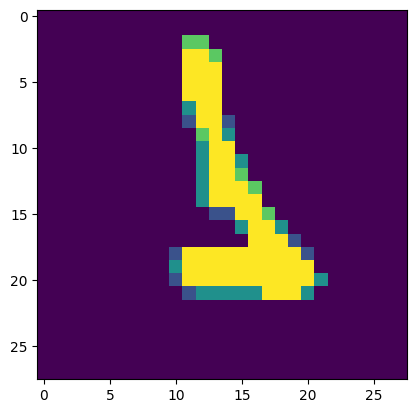

2


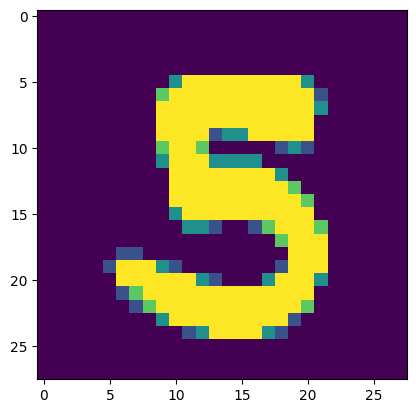

3


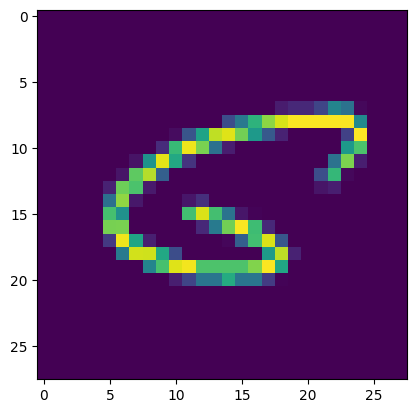

5


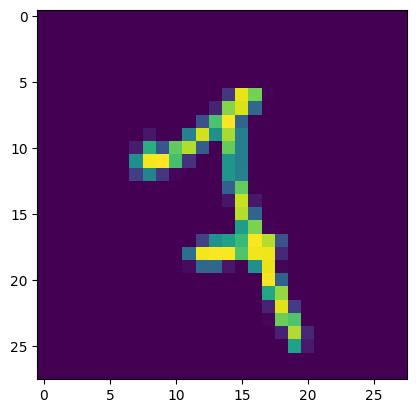

1


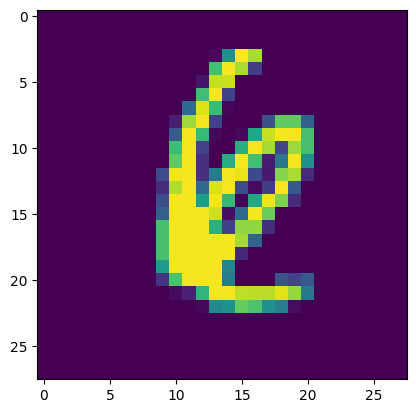

8


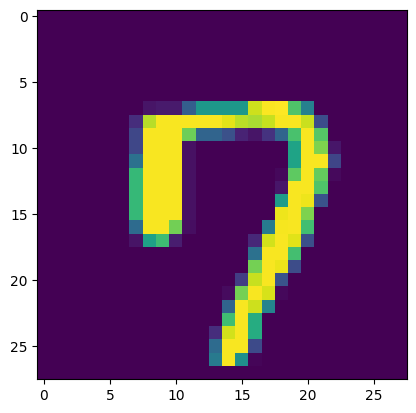

9


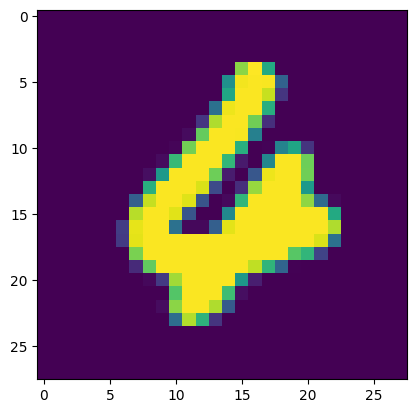

6


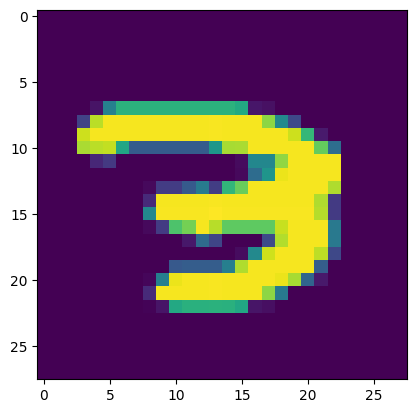

7


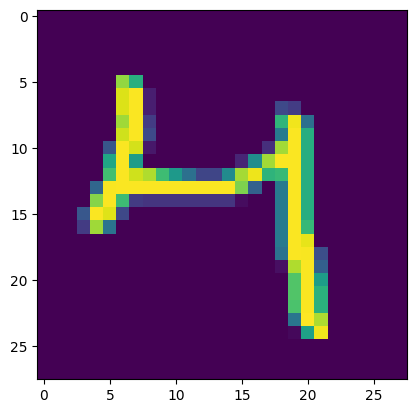

9


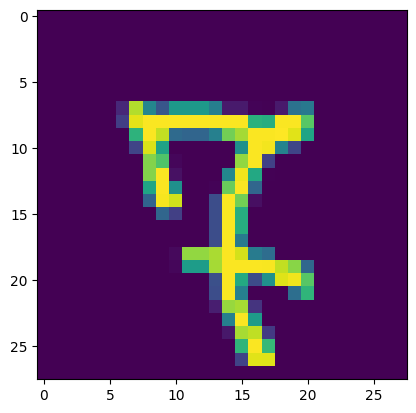

8


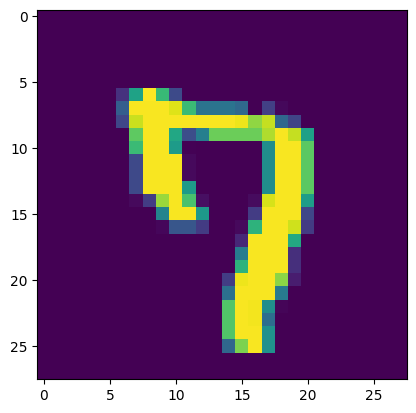

9


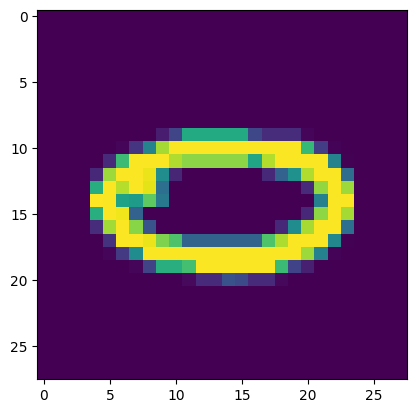

9


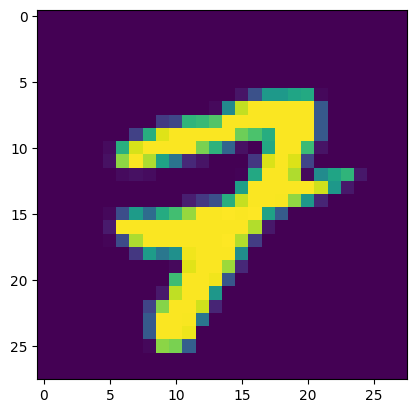

9


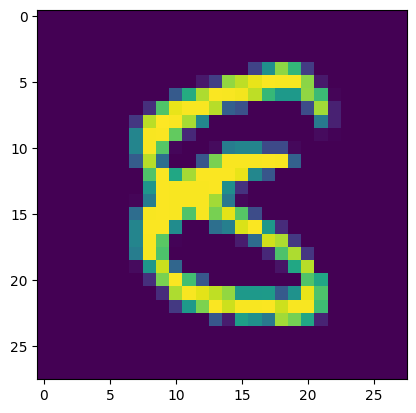

6


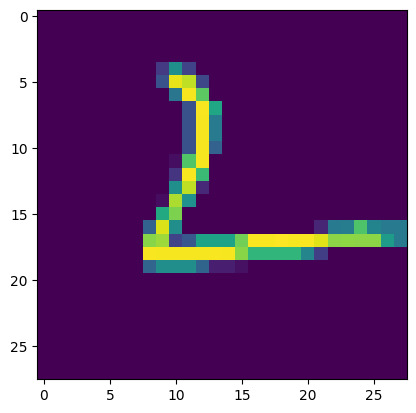

4


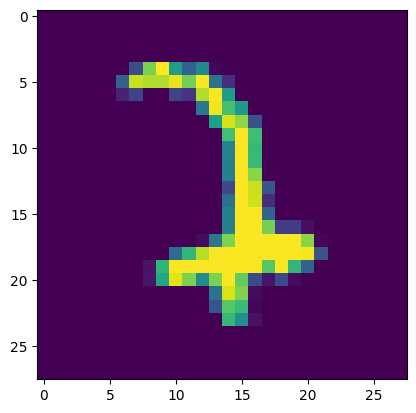

2


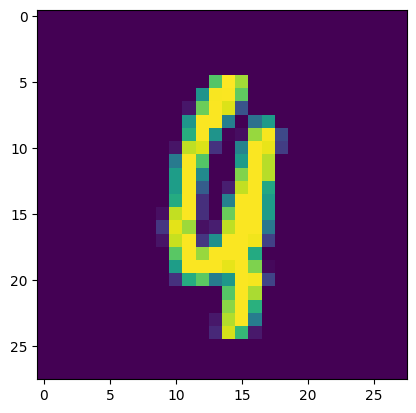

4


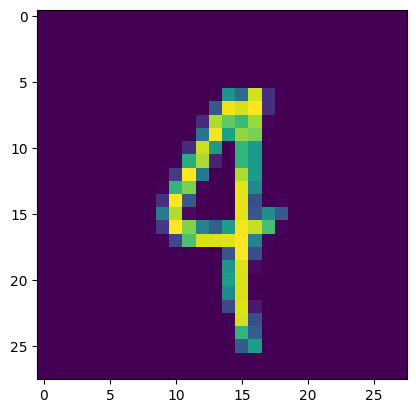

9


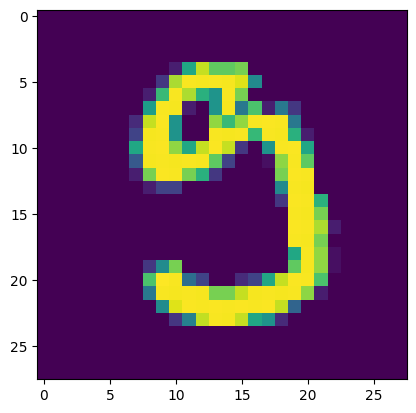

5


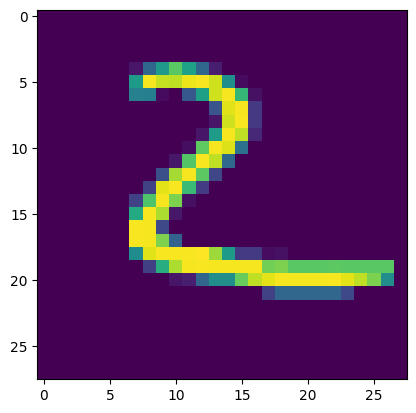

1


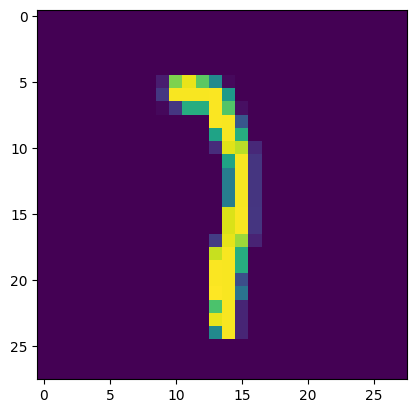

1


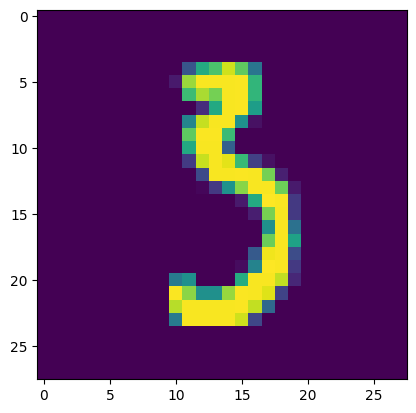

9


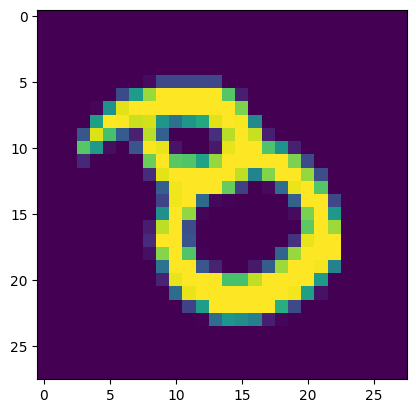

0


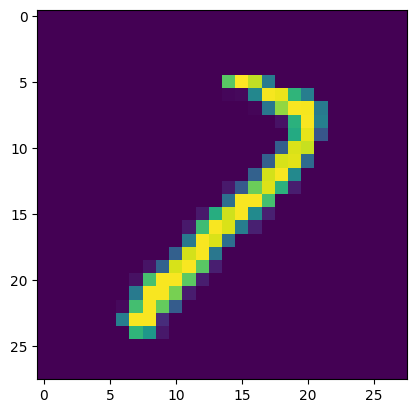

2


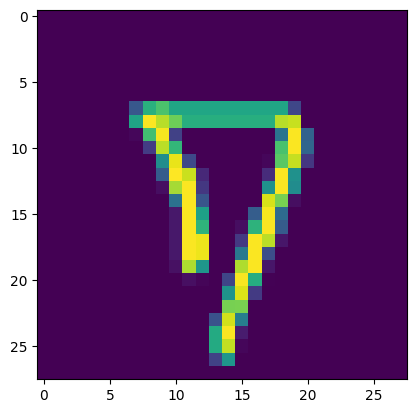

9


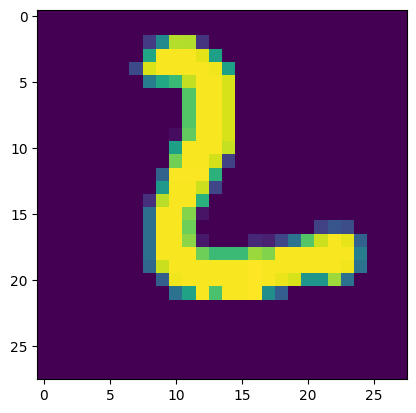

6


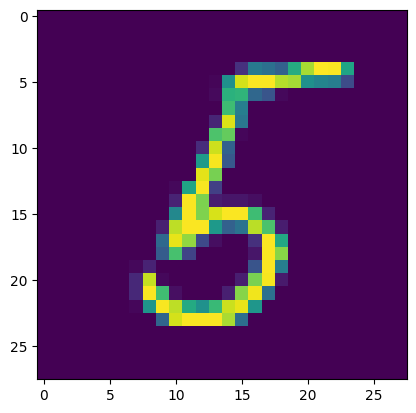

6


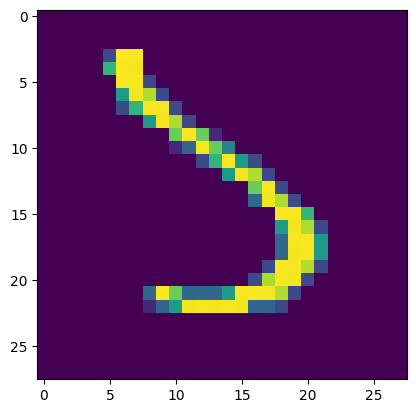

3


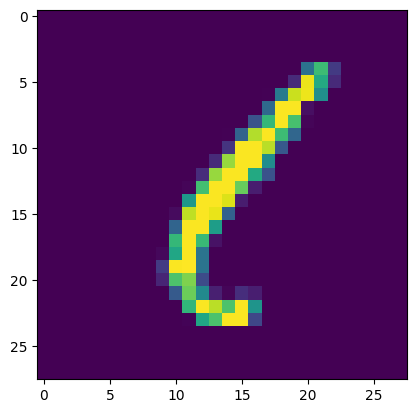

8


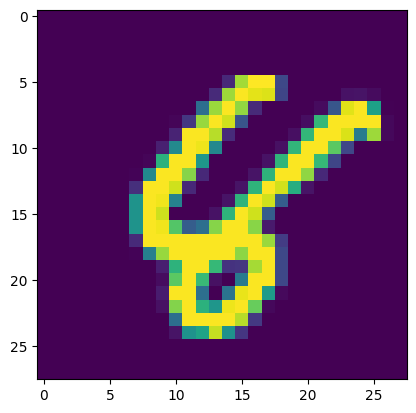

4


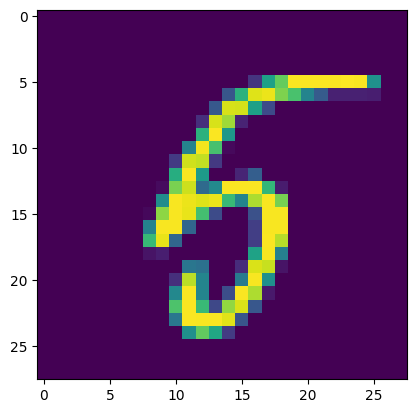

6


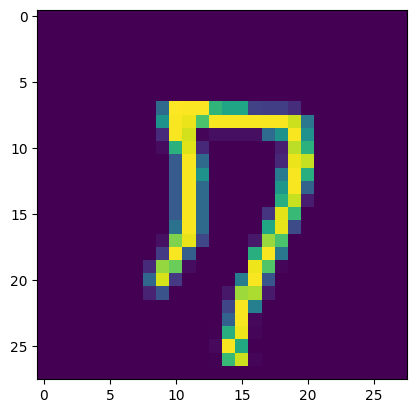

9


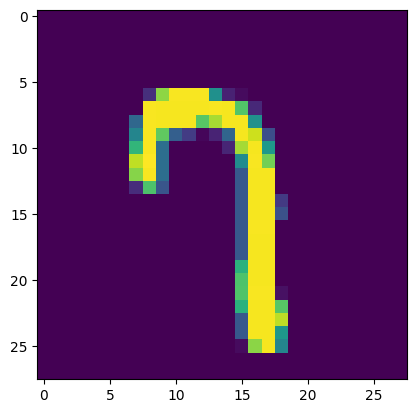

9


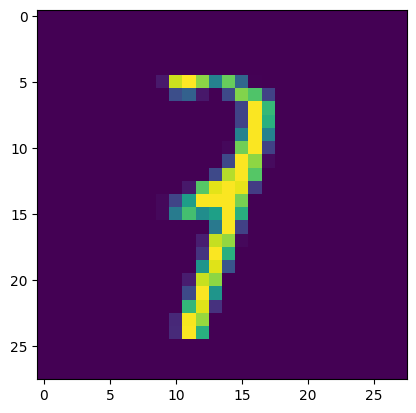

3


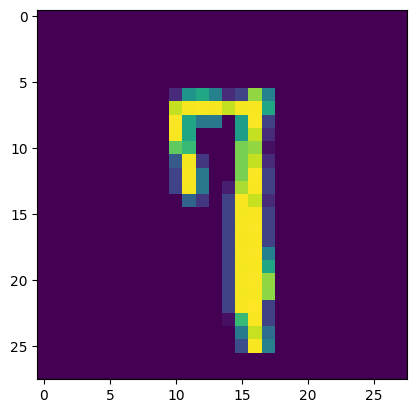

9


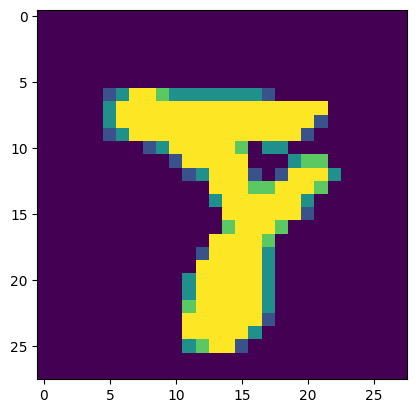

7


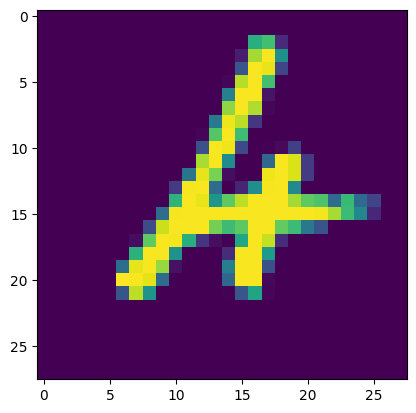

6


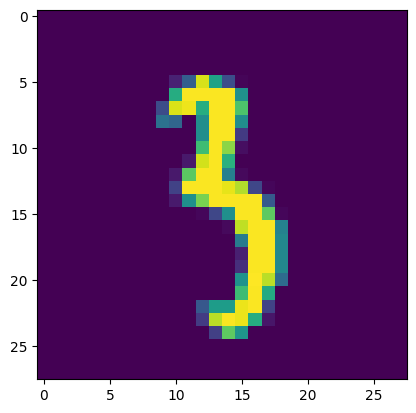

1


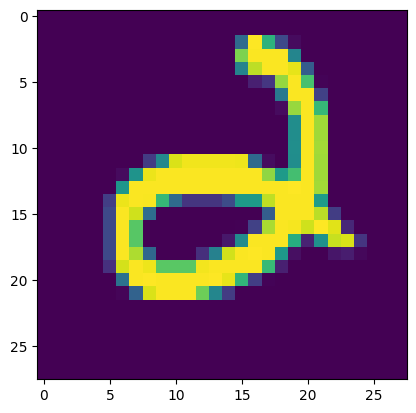

3


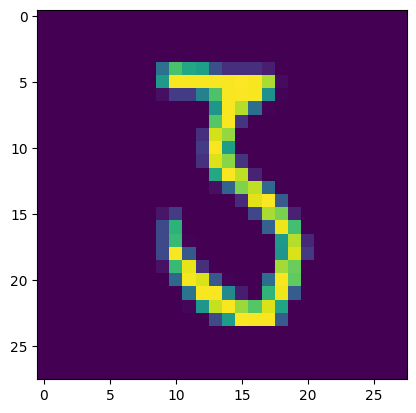

9


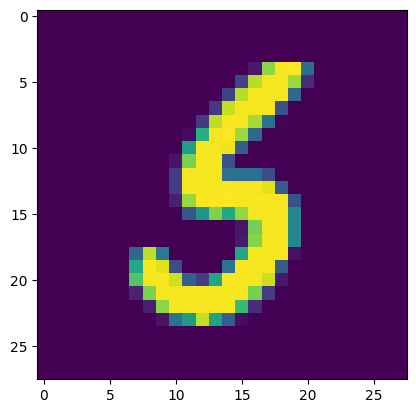

3


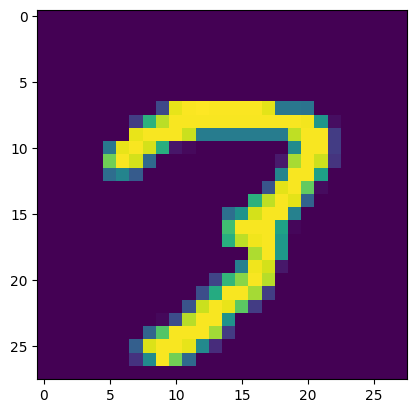

7


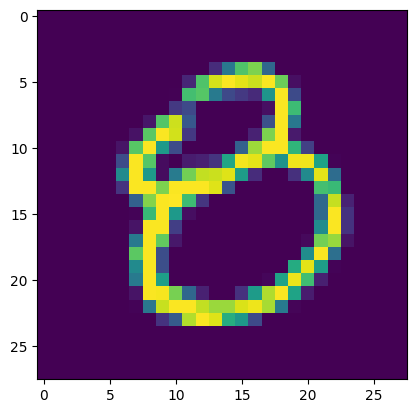

0


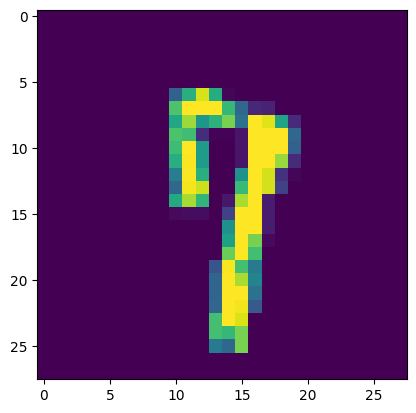

4


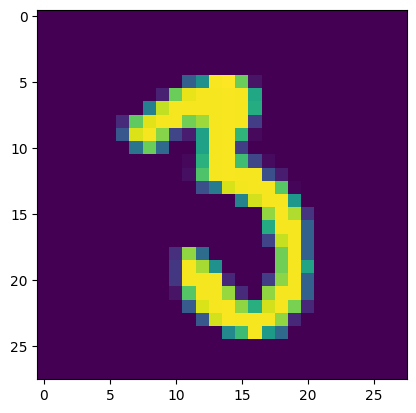

9


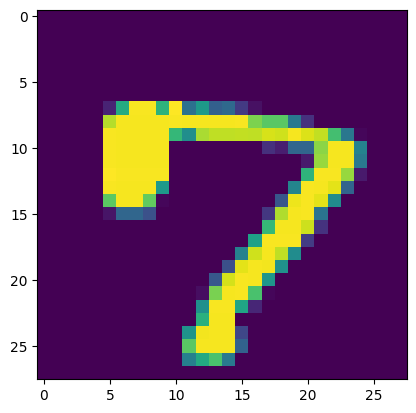

9


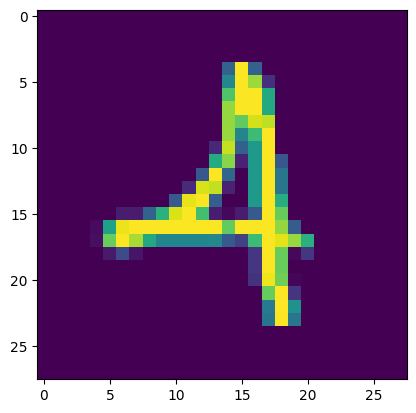

3


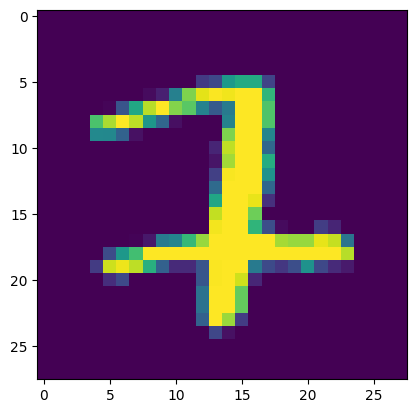

2


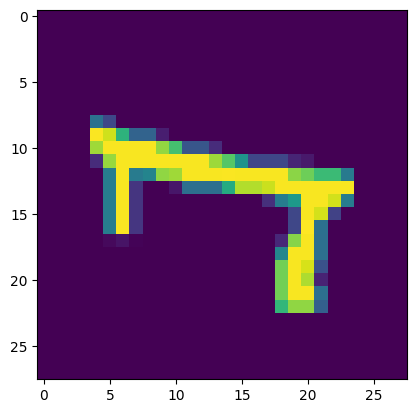

9


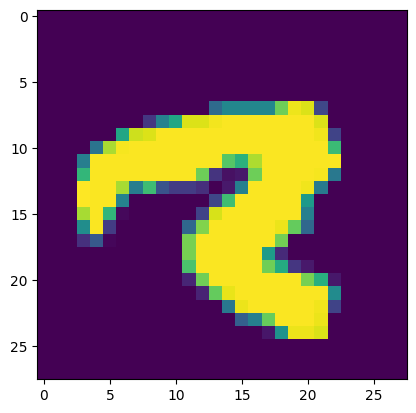

8


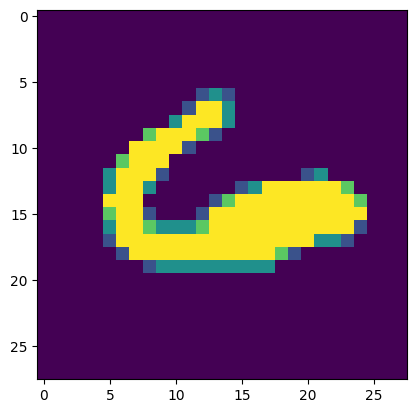

4


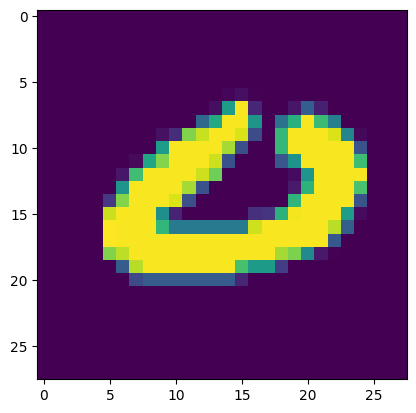

4


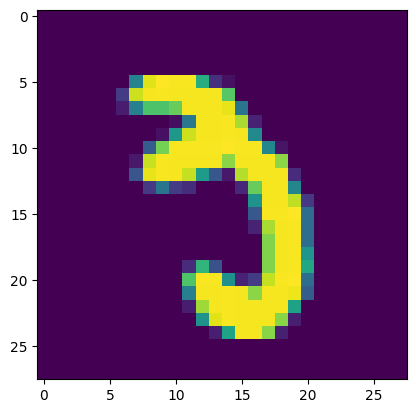

9


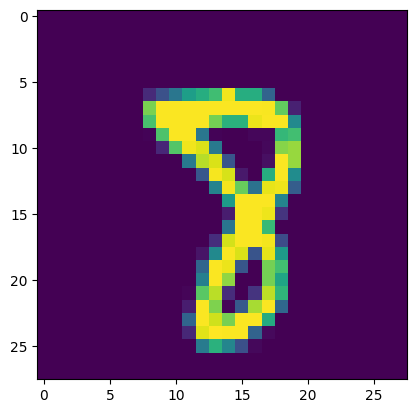

9


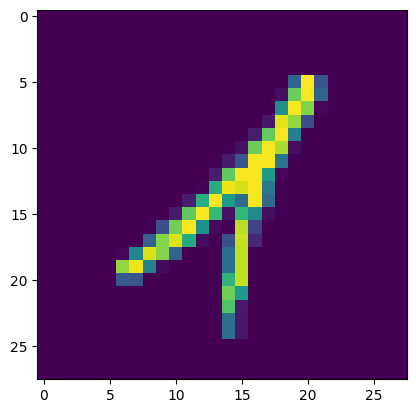

3


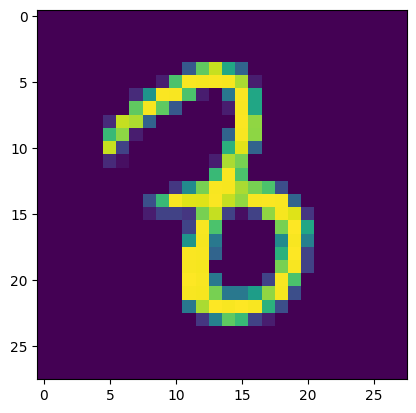

3


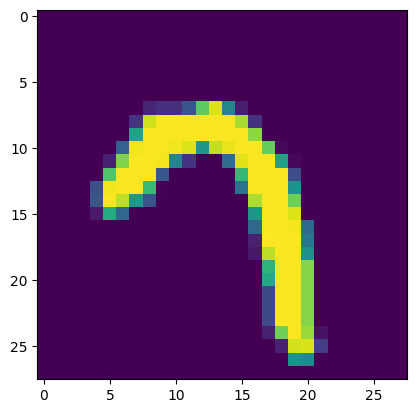

9


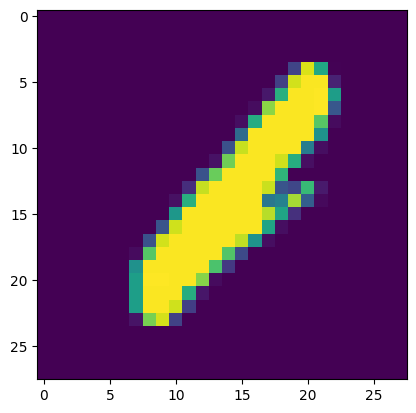

4


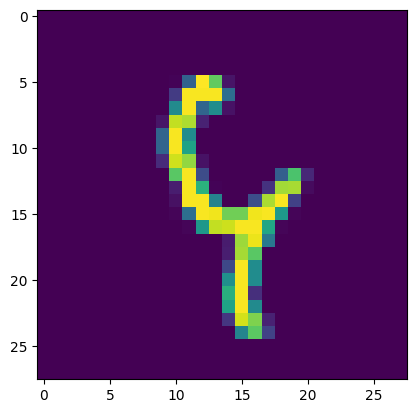

4


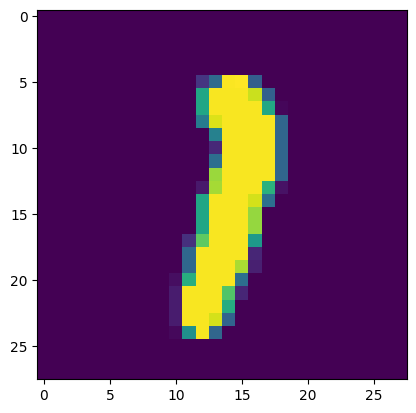

In [98]:
test_X = test_X.reshape((test_X.shape[0],28,28))
for i,j in zip(iter,pred):
    plt.imshow(test_X[i])
    plt.show()
    print(j)